In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

users = pd.read_csv("users.csv")
events = pd.read_csv("events.csv")

print("users shape:", users.shape)
print("events shape:", events.shape)


users shape: (100, 6)
events shape: (1858, 3)


In [7]:
users.columns = [c.strip() for c in users.columns]
events.columns = [c.strip() for c in events.columns]

#转换日期
users['signup_date_raw'] = users.get('signup_date')
events['timestamp_raw'] = events.get('timestamp')

users['signup_date'] = pd.to_datetime(users['signup_date'], errors='coerce', infer_datetime_format=True)
events['timestamp'] = pd.to_datetime(events['timestamp'], errors='coerce', infer_datetime_format=True)

print("signup_date NaT count:", users['signup_date'].isna().sum())
print("events.timestamp NaT count:", events['timestamp'].isna().sum())


signup_date NaT count: 0
events.timestamp NaT count: 0


C:\Users\13673\AppData\Local\Temp\ipykernel_40832\1221447290.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  users['signup_date'] = pd.to_datetime(users['signup_date'], errors='coerce', infer_datetime_format=True)
C:\Users\13673\AppData\Local\Temp\ipykernel_40832\1221447290.py:9: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  events['timestamp'] = pd.to_datetime(events['timestamp'], errors='coerce', infer_datetime_format=True)


In [9]:
#标准化性别
if 'gender' in users.columns:
    users['gender'] = users['gender'].astype(str).str.strip().str.lower().replace({'nan': np.nan})
    def norm_gender(x):
        if pd.isna(x): return np.nan
        x = x.lower()
        if x in ['male']: return 'Male'
        if x in ['female']: return 'Female'
        if x in ['other']: return 'Other'
        return x.capitalize()
    users['gender'] = users['gender'].apply(norm_gender)
else:
    users['gender'] = np.nan

print("Gender value counts:\n", users['gender'].value_counts(dropna=False))

Gender value counts:
 gender
Male      49
Female    44
Other      7
Name: count, dtype: int64


In [11]:
#清洗年龄数据
if 'age' in users.columns:
    users['age_raw'] = users['age']
    users['age'] = pd.to_numeric(users['age'], errors='coerce')
    invalid_age_mask = (users['age'] < 0) | (users['age'] > 100)
    users.loc[invalid_age_mask, 'age'] = np.nan
    print(users['age'].describe())
else:
    print("No age column found.")

if 'user_id' in users.columns:
    users = users.drop_duplicates(subset='user_id', keep='first').reset_index(drop=True)

count    100.000000
mean      37.910000
std       12.219454
min       18.000000
25%       26.750000
50%       38.000000
75%       46.250000
max       59.000000
Name: age, dtype: float64


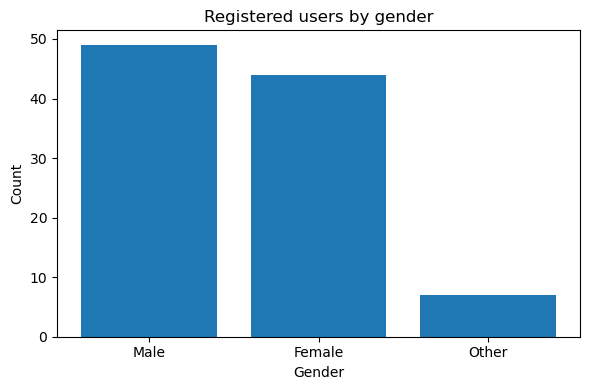

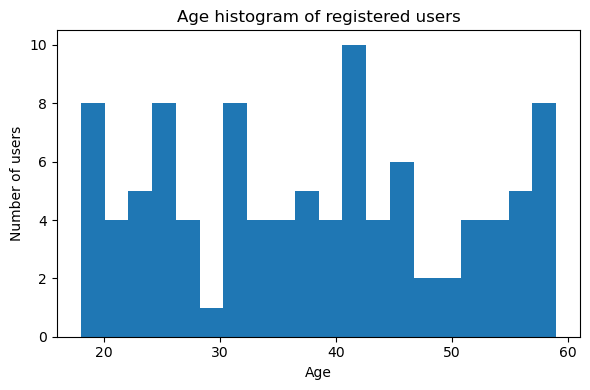

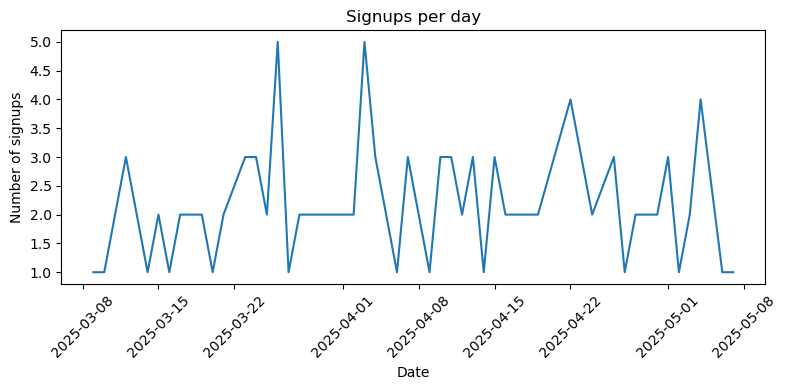

Saved cleaned users to /mnt/data/users_cleaned_for_analysis.csv


In [13]:
#画图
# 1 注册用户的性别分布
gender_counts = users['gender'].value_counts(dropna=False)
labels = [str(x) if (pd.notna(x)) else 'Unknown' for x in gender_counts.index]
plt.figure(figsize=(6,4))
plt.bar(labels, gender_counts.values)
plt.title("Registered users by gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 2 用户年龄直方图
if users['age'].notna().sum() > 0:
    ages = users['age'].dropna()
    plt.figure(figsize=(6,4))
    bins = min(20, max(5, int(len(ages) / 5)))
    plt.hist(ages, bins=bins)
    plt.title("Age histogram of registered users")
    plt.xlabel("Age")
    plt.ylabel("Number of users")
    plt.tight_layout()
    plt.show()
else:
    print("No valid")

# 3 注册用户按日期统计的时间趋势图
if users['signup_date'].notna().sum() > 0:
    signup_counts = users.groupby(users['signup_date'].dt.date).size().sort_index()
    plt.figure(figsize=(8,4))
    plt.plot(list(signup_counts.index), signup_counts.values)
    plt.title("Signups per day")
    plt.xlabel("Date")
    plt.ylabel("Number of signups")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No valid")

users.to_csv('users_cleaned.csv', index=False)
print("Saved cleaned users to /mnt/data/users_cleaned_for_analysis.csv")
